In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import pylab as pl

from itertools import product

In [ ]:
!ls -l /datasets/combined_models/

total 2468990
-rwxrw-rw- 1 jovyan users 533443130 Dec 28 10:28  combined_jdotp_alphaTH_0.csv
-rwxrw-rw- 1 jovyan users 538237658 Dec 28 10:28 'combined_jdotp_CE=TH.csv'
-rwxrw-rw- 1 jovyan users 725240603 Dec 28 10:30  combined_mdot_alphaTH_0.csv
-rwxrw-rw- 1 jovyan users 731323242 Dec 28 10:30 'combined_mdot_CE=TH.csv'


In [ ]:
basedir = '/datasets/combined_models/'

In [ ]:
data = pd.read_csv(basedir+'combined_mdot_alphaTH_0.csv')
#data = pd.read_csv(basedir+'combined_mdot_CE=TH.csv')

#data = pd.read_csv(basedir+'combined_jdotp_alphaTH_0.csv')
# data = pd.read_csv(basedir+'combined_jdotp_CE=TH.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752275 entries, 0 to 1752274
Data columns (total 37 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   stability                    object 
 2   FeH_init                     float64
 3   P_init                       float64
 4   P_final                      float64
 5   M1_init                      float64
 6   M1_final                     float64
 7   M2_init                      float64
 8   M2_final                     float64
 9   q_init                       float64
 10  q_final                      float64
 11  delta_max                    float64
 12  logg_HeCoreBurning           float64
 13  teff_HeCoreBurning           float64
 14  rad_HeCoreBurning            float64
 15  M1_HeCoreBurning             float64
 16  M1core_HeCoreBurning         float64
 17  logg2_HeCoreBurning          float64
 18  teff2_HeCoreBurning          float64
 19  

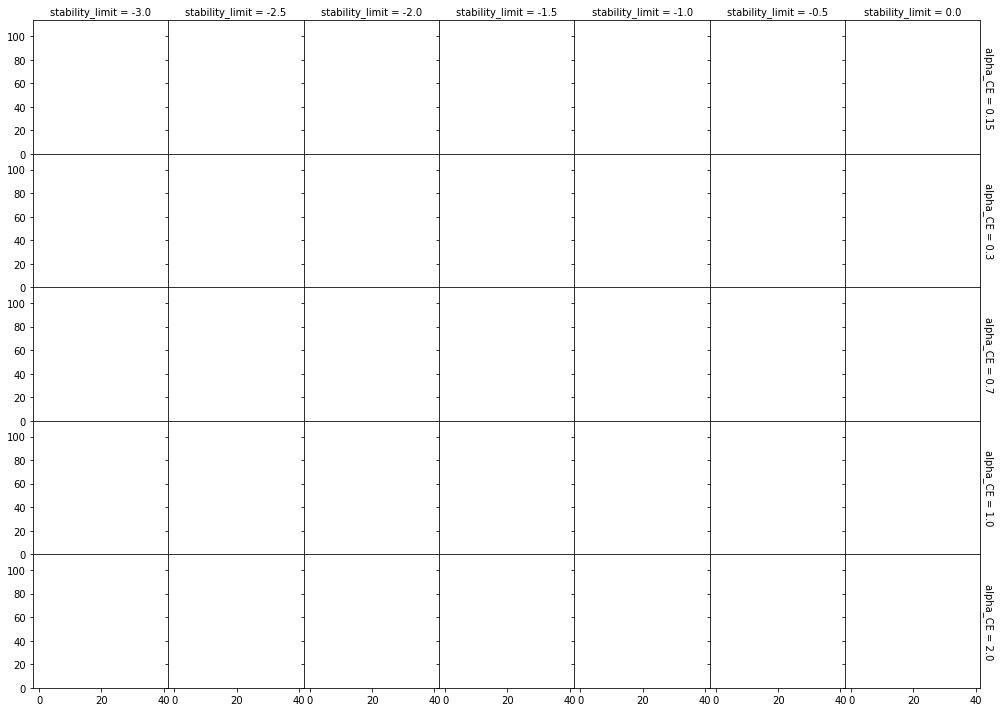

In [ ]:
data_sel = data[(data['stability'] == 'CE') & (data['product'] == 'sdB') & (data['P_final'] < 40)]

data_sel = data_sel[data_sel['alpha_CE'].isin([0.15, 0.30, 0.70, 1.0, 2.0])]

def annotate(data, **kws):
    n = len(data)
    ax = pl.gca()
    avg = np.round(data['P_final'].median(),2)
    
    ax.text(.6, .9, f"N = {n}", transform=ax.transAxes, color='w')
    ax.text(.5, .8, f"avg = {avg}", transform=ax.transAxes, color='w')
    
    # ax.set_facecolor("{}".format(avg / 10))

g = sns.FacetGrid(data_sel, col="stability_limit", row="alpha_CE", margin_titles=True, despine=False, height=2)
# g.map_dataframe(annotate)
g.map_dataframe(sns.histplot, x="P_final", color='w', lw=0)
g.fig.subplots_adjust(wspace=0, hspace=0)

In [ ]:
def create_heatmap(data, xpar='stability_limit', ypar='alpha_CE', process_function=None, **kwargs):
    
    x = data[xpar].unique()
    y = data[ypar].unique()
    
    cells = list(product(x, y))
    x, y, values = [], [], []
    
    for cel in cells:
        d = data[(data[xpar] == cel[0]) & (data[ypar] == cel[1])]
        x.append(cel[0])
        y.append(cel[1])
        values.append(process_function(d))
        
    table = pd.DataFrame(data={xpar:x, ypar:y, 'value':values})
    table = table.pivot(xpar, ypar, "value")
    
    sns.heatmap(table, annot=True, square=True, cbar_kws={"orientation": "horizontal"}, **kwargs)
    pl.title(process_function.__name__)
    
    
    lineind = list(table.columns).index(1.0) + 1
    pl.axvline(x=lineind, color='k', ls='--')
    

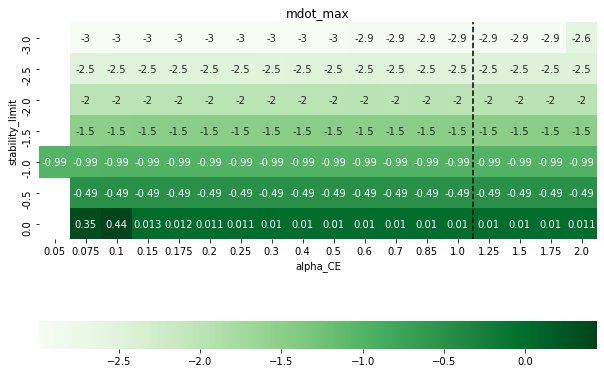

In [ ]:
data_sel = data[data['observable_short'] == 1]

def mdot_max(data):
    return data['Mdot_max'].median()

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=mdot_max,
               cmap='Greens')

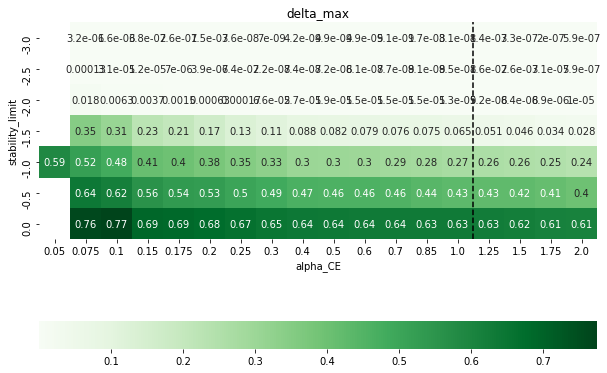

In [ ]:
data_sel = data[data['observable_short'] == 1]

def delta_max(data):
    return data['delta_max'].median()

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=delta_max,
               cmap='Greens')

# Typical heatmap

### post Stable RLOF systems VS post CE systems

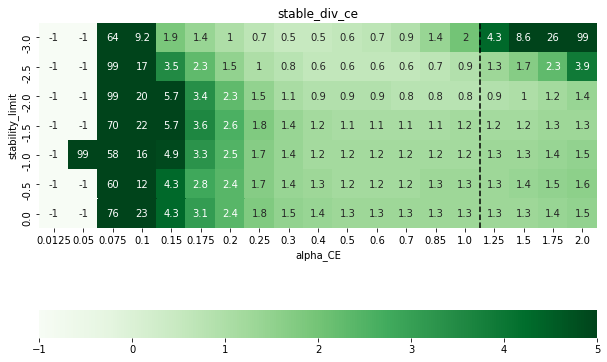

In [ ]:
#data_sel = data[data['product'] == 'sdB']
data_sel = data[data['observable_sd'] == 1]

def stable_div_ce(data):
    nce = len(data[data['stability'] == 'CE'])
    nstable = len(data[data['stability'] == 'stable'])
    
    if nce == 0:
        return -1
    if nstable / nce > 99:
        return 99
    else:
        return np.round(nstable / nce,1)
        
pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=stable_div_ce,
               cmap='Greens', vmax=5)


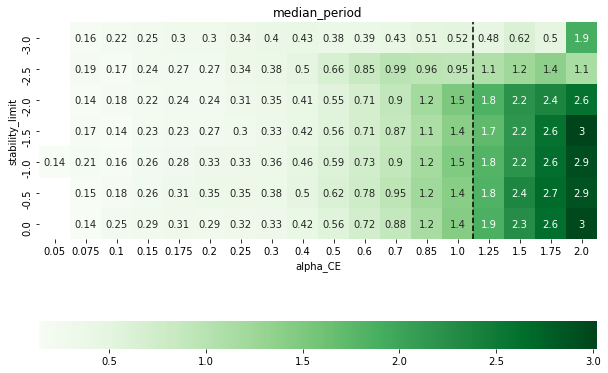

In [ ]:
# data_sel = data[(data['product'] == 'sdB') & (data['stability'] == 'CE')]
data_sel = data[(data['observable_short'] == 1)]

def median_period(data):
    
    return data['P_final'].median()

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=median_period,
               cmap='Greens')

# Using divergent color maps centered on an interesting value. 
Can be used to match with observations

### Nr of HB systems vs Nr of sdB systems

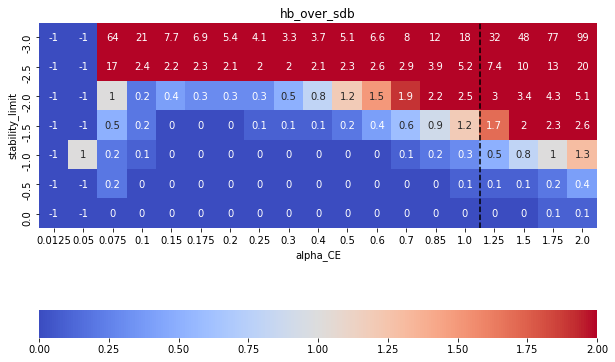

In [ ]:
data_sel = data[data['stability'] == 'CE']

def hb_over_sdb(data):
    nhb = len(data[data['product'] == 'HB'])
    nsdb = len(data[data['product'] == 'sdB'])
    
    if nsdb == 0:
        return -1
    elif nhb / nsdb > 100:
        return 99
    else:
        return np.round( nhb / nsdb, 1)

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=hb_over_sdb,
               vmin=0, vmax=2, cmap='coolwarm')

# NOTE: We need to select the observable HBs in the same way as we do the sdBs based on Gaia cuts for a more usefull comparison.

### Nr sdB+K systems VS Nr of sdB+dM systems

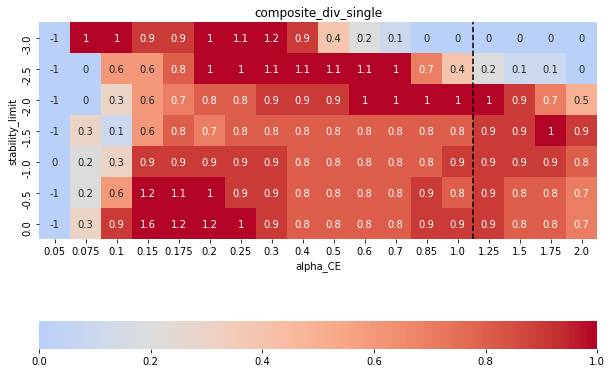

In [ ]:
# data_sel = data[(data['product'] == 'sdB') & (data['stability'] == 'CE')]
data_sel = data[(data['observable_short'] == 1)]

def composite_div_single(data):
    nM = len(data[data['M2_final'] < 0.5])
    nK = len(data[data['M2_final'] > 0.5])
    
    if nM == 0:
        return -1
    else:
        return round(nK / nM,1)

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=composite_div_single,
               center=0.2, cmap='coolwarm', vmin=0, vmax=1)

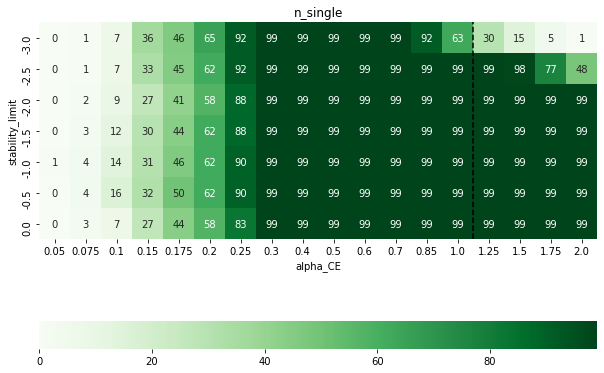

In [ ]:
data_sel = data[(data['observable_short'] == 1)]

def n_single(data):

    nM = len(data[data['M2_final'] < 0.5])

    return min(nM, 99) 



pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=n_single,
               cmap='Greens')

# showing the difference between observations and models

### difference between median logP observed and median logP modeled

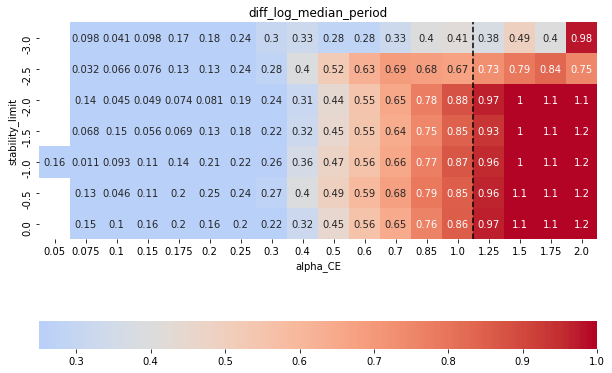

In [ ]:
# data_sel = data[(data['product'] == 'sdB') & (data['stability'] == 'CE')]
data_sel = data[(data['observable_short'] == 1)]

def diff_log_median_period(data):
    
    return abs(np.log10(data['P_final'].median()) - np.log10(0.2))

pl.figure(figsize=(10,10))
create_heatmap(data_sel, xpar='stability_limit', ypar='alpha_CE', process_function=diff_log_median_period,
               cmap='coolwarm', vmin=0.25, vmax=1, center=0.4)